## About Dataset
This dataset was collected from an open-source Amazon reviews made available by Jianmo Ni

## Content
This dataset contains full reviews from Amazon in 2018, consists of 500000+ reviews from 100000+ users. The columns are pretty much self-explanatory, such as userName, itemName, rating, reviewText, etc



In [30]:
import kagglehub

path = kagglehub.dataset_download("rogate16/amazon-reviews-2018-full-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'amazon-reviews-2018-full-dataset' dataset.
Path to dataset files: /kaggle/input/amazon-reviews-2018-full-dataset


In [ ]:
import os
print(os.listdir(path))

['amazon_reviews.csv']


In [ ]:
import pandas as pd

csv_file = os.path.join(path, "amazon_reviews.csv")

customer_df = pd.read_csv(csv_file, encoding='utf-8')
print(customer_df.head())

print("Shape:", customer_df.shape)
print("Columns:", customer_df.columns)


          userName  verified  \
0  Amazon Customer      True   
1            Carla      True   
2           Jaclyn      True   
3     Christinne M     False   
4            Sandy      True   

                                            itemName  \
0  Toblerone Swiss Milk Chocolate Bar, Crunchy Sa...   
1  Prince of Peace Organic Tea, Oolong, 100 Tea Bags   
2  Pet Champion Adjustable No-Pull Harness, Colla...   
3  Koh-I-Noor Progresso Woodless Colored 24-Penci...   
4  Parker Urban Premium Ebony Metal Chiseled, Bal...   

                                         description  \
0  ["Made from deliciously decadent ingredients, ...   
1  ['Prince of Peace Enterprises, Inc., founded i...   
2  ["The Pet Champion Large/ Extra Large 22-36 in...   
3  ['Koh-I-Noor Progresso Woodless Colored 24-Pen...   
4  ["Stunning craftsmanship based on a classic st...   

                                               image            brand  \
0  ['https://images-na.ssl-images-amazon.com/imag...        

In [ ]:
customer_df

,userName,verified,itemName,description,image,brand,feature,category,price,rating,reviewTime,summary,reviewText,vote
0,Amazon Customer,True,"Toblerone Swiss Milk Chocolate Bar, Crunchy Sa...","[""Made from deliciously decadent ingredients, ...",['https://images-na.ssl-images-amazon.com/imag...,Toblerone,[],Prime_Pantry,$1.63,5.0,2018-01-01,Five Stars,super smooth and yummy with crunchy bits,0
1,Carla,True,"Prince of Peace Organic Tea, Oolong, 100 Tea Bags","['Prince of Peace Enterprises, Inc., founded i...",['https://images-na.ssl-images-amazon.com/imag...,Prince Of Peace,[],Grocery_and_Gourmet_Food,$6.40,5.0,2018-01-01,Five Stars,Perfect for kombucha,0
2,Jaclyn,True,"Pet Champion Adjustable No-Pull Harness, Colla...","[""The Pet Champion Large/ Extra Large 22-36 in...",['https://images-na.ssl-images-amazon.com/imag...,Pet Champion,"['Features Bright Pink Lemonade pattern', 'Dua...",Pet_Supplies,$7.99,5.0,2018-01-01,she has an odd shape chest and her pull over h...,Finally a harness that fits my puppy. I really...,0
3,Christinne M,False,Koh-I-Noor Progresso Woodless Colored 24-Penci...,['Koh-I-Noor Progresso Woodless Colored 24-Pen...,['https://images-na.ssl-images-amazon.com/imag...,KOH-I-NOOR,"['Rich, pigmented, solid color encased in lacq...",Arts_Crafts_and_Sewing,$14.18,5.0,2018-01-01,Loving!!,I LOVE THEM!! I bought them at Micheals our of...,0
4,Sandy,True,"Parker Urban Premium Ebony Metal Chiseled, Bal...","[""Stunning craftsmanship based on a classic st...",['https://images-na.ssl-images-amazon.com/imag...,Parker,['Ebony black with metallic highlights and a g...,Office_Products,NaN,5.0,2018-01-01,I love this pen,"I love this pen! I love the shape of it, the f...",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551154,Greg,True,Pandahall 10m(32.80 feet) Platinum Color Iron ...,"['Iron Twist Chains, Platinum Color<P>Size: Ri...",['https://images-na.ssl-images-amazon.com/imag...,PH PandaHall,"['Iron Twist Chains, Platinum Color, Ring: abo...",Arts_Crafts_and_Sewing,$8.29,2.0,2018-10-03,Two Stars,Cheap price but weak chain.,0
551155,Gayle LaRue,True,Keter Westwood Plastic Deck Storage Container ...,"['Plenty of storage and comfortable seating, a...",['https://images-na.ssl-images-amazon.com/imag...,Keter,['Outside Dimensions: 61 in. L x 28.5 in. W x ...,Patio_Lawn_and_Garden,$121.76,4.0,2018-10-03,Deck box good investment,Great deck box,0
551156,Alfred D. Wallace,True,AcuRite 06052M Remote Battery Pack for 5-in-1 ...,"[""The AcuRite remote battery pack plugs into t...",['https://images-na.ssl-images-amazon.com/imag...,AcuRite,['Makes battery replacement easy for AcuRite 5...,Patio_Lawn_and_Garden,$19.95,5.0,2018-10-03,This will keep the old man off the roof!,Putting these in my weather station. I anticip...,0
551157,Dave Dunn Wilmer,True,Keter Unity XL Indoor Outdoor Entertainment BB...,['The extra-large outdoor entertainment statio...,['https://images-na.ssl-images-amazon.com/imag...,Keter,['Dimensions: 53.1 in. L x 20.4 in. W x 35.4 i...,Patio_Lawn_and_Garden,$155.64,5.0,2018-10-03,EASY TO ASSEMBLE AND WORKS WELL NEXT TO GRILL,This is a nice quality grilling table where yo...,0


In [ ]:
def remove_punctuation(text):
    import string
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)


## Exercise 1 (data preparation)
a) Remove punctuation from reviews using the given function.   
b) Replace all missing (nan) revies with empty "" string.  
c) Drop all the entries with rating = 3, as they have neutral sentiment.   
d) Set all positive ($\geq$4) ratings to 1 and negative($\leq$2) to -1.

## a) Remove punctuation from reviews using the given function.   
## b) Replace all missing (nan) revies with empty "" string.  


In [ ]:
import string


# a) b)
customer_df['reviewText'] = customer_df['reviewText'].fillna('')
customer_df['reviewText'] = customer_df['reviewText'].apply(remove_punctuation)

print(customer_df['reviewText'].head())


0             super smooth and yummy with crunchy bits
1                                 Perfect for kombucha
2    Finally a harness that fits my puppy I really ...
3    I LOVE THEM I bought them at Micheals our of c...
4    I love this pen I love the shape of it the fee...
Name: reviewText, dtype: object


## c) Drop all the entries with rating = 3, as they have neutral sentiment.   


In [ ]:
customer_df = customer_df[customer_df['rating'] != 3]

print(sum(customer_df["rating"] == 3))


0


## d) Set all positive ($\geq$4) ratings to 1 and negative($\leq$2) to -1.

In [ ]:
def map_sentiment(rating):
    if rating >= 4:
        return 1
    else:
        return -1

customer_df['rating'] = customer_df['rating'].apply(map_sentiment)

print(sum(customer_df["rating"]**2 != 1))


0


/tmp/ipython-input-2079576342.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_df['rating'] = customer_df['rating'].apply(map_sentiment)


## Exercise 2
a) Split dataset into training and test sets.     
b) Transform reviews into vectors using CountVectorizer.

## a) Split dataset into training and test sets.     


In [ ]:
from sklearn.model_selection import train_test_split
#a)
train_data, test_data = train_test_split(customer_df, train_size=0.8, test_size=0.2)

## b) Transform reviews into vectors using CountVectorizer.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# b)
vectorizer = CountVectorizer()

# Ensure reviewText columns are strings and handle any remaining NaN/None values
train_data['reviewText'] = train_data['reviewText'].astype(str).replace('nan', '')
test_data['reviewText'] = test_data['reviewText'].astype(str).replace('nan', '')

X_train = vectorizer.fit_transform(train_data['reviewText'])
X_test = vectorizer.transform(test_data['reviewText'])

Y_train = train_data['rating']
Y_test = test_data['rating']

In [ ]:
print(Y_train.value_counts())
print(Y_test.value_counts())

rating
 1    362580
-1     45836
Name: count, dtype: int64
rating
 1    90506
-1    11598
Name: count, dtype: int64


## Exercise 3
a) Train LogisticRegression model on training data (reviews processed with CountVectorizer, ratings as they were).   
b) Print 10 most positive and 10 most negative words.

## a) Train LogisticRegression model on training data (reviews processed with CountVectorizer, ratings as they were).   


In [ ]:
from sklearn.linear_model import LogisticRegression

#a)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

## b) Print 10 most positive and 10 most negative words.

In [ ]:
import numpy as np

#b)
coefs = model.coef_[0]
words = np.array(vectorizer.get_feature_names_out())
sorted_indices = np.argsort(coefs)

print("10 most negative words:")
print(words[sorted_indices[:10]])

print("\n10 most positive words:")
print(words[sorted_indices[-10:]])

#hint: model.coef_, vectorizer.get_feature_names()

10 most negative words:
['worthless' 'disappointing' 'dissapointed' 'yuck' 'flavorless' 'worst'
 'bs' 'tasteless' 'useless' 'unusable']

10 most positive words:
['hesitate' 'ribbons' 'yummy' 'perfect' 'excellent' 'delicious'
 'complaints' 'outstanding' 'amazing' 'yum']


## Exercise 4
a) Predict the sentiment of test data reviews.   
b) Predict the sentiment of test data reviews in terms of probability.   
c) Find five most positive and most negative reviews.   
d) Calculate the accuracy of predictions.

In [ ]:
#a)
y_pred = model.predict(X_test)

print(y_pred)


[1 1 1 ... 1 1 1]


In [ ]:
#b)
probability = model.predict_proba(X_test)

probability

#hint: model.predict_proba()

array([[0.01127193, 0.98872807],
       [0.0026634 , 0.9973366 ],
       [0.00312553, 0.99687447],
       ...,
       [0.23906493, 0.76093507],
       [0.0055691 , 0.9944309 ],
       [0.0023621 , 0.9976379 ]])

In [ ]:
#c)

top5_pos_idx = np.argsort(probability[:, 1])[-5:][::-1]
top5_neg_idx = np.argsort(probability[:, 0])[-5:][::-1]

print("5 most positive reviews:")
for i in top5_pos_idx:
    print(f"\n Review {i+1}:\n {test_data.iloc[i]['reviewText']}")

print("\n5 most negative reviews:")
for i in top5_neg_idx:
    print(f"\n Review {i+1}:\n {test_data.iloc[i]['reviewText']}")

5 most positive reviews:

 Review 99872:
 Every household should have a Weber Kettle, and unless you need the workspace of the performer or the space of the 26", this is the kettle to get in my opinion.

Ok that's a little bit of hyperbole, and there are other great charcoal grills out there (PK grill etc), but for the price, the quality and the features I do think the weber kettle makes a compelling case to be in your back yard.

I have owned many higher end grills in my life - large Big Green Egg, mini big green egg, high end gas grills including TEC, Solaire, and Weber Genesis.  I've been grilling multiple times a week for years, and I live in FL so grilling is year round.  I ultimately returned to the same thing my dad and I used when I was growing up - a black weber kettle.  I do highly recommend one aftermarket addition to the kettle, the Adrenaline BBQ Company Slow N Sear&nbsp;<a data-hook="product-link-linked" class="a-link-normal" href="/Slow-N-Sear/dp/B014O9YB6G/ref=cm_cr_arp

In [ ]:
#d)
accuracy = model.score(X_test, Y_test)

print("Accuracy on test set:", accuracy)


Accuracy on test set: 0.9418338165008227


## Decision Tree Classifier

- **Model**: Decision Tree Classifier (`max_depth=10`, `min_samples_split=50`) trained on `X_train` and `Y_train`.

- **Evaluation**: Accuracy computed on `X_test` and `Y_test` and compared with Logistic Regression.

- **Visualization**: First 3 levels of the tree plotted using `plot_tree`, showing feature-based splits and class predictions (`Negative` vs `Positive`).

## How the Decision Tree Classifier Works

1. **Input**: Preprocessed review text converted into numeric features using CountVectorizer.
2. **Training**: The decision tree learns rules to split the data based on words that best separate positive (`1`) and negative (`-1`) reviews.
3. **Prediction**: For a new review, the model follows the tree's splits (e.g., "contains 'great' → positive") to assign a sentiment label.
4. **Output**: Predicted sentiment (`Positive` or `Negative`) for each review.




Decision Tree Accuracy: 0.9017
Logistic Regression Accuracy: 0.9418


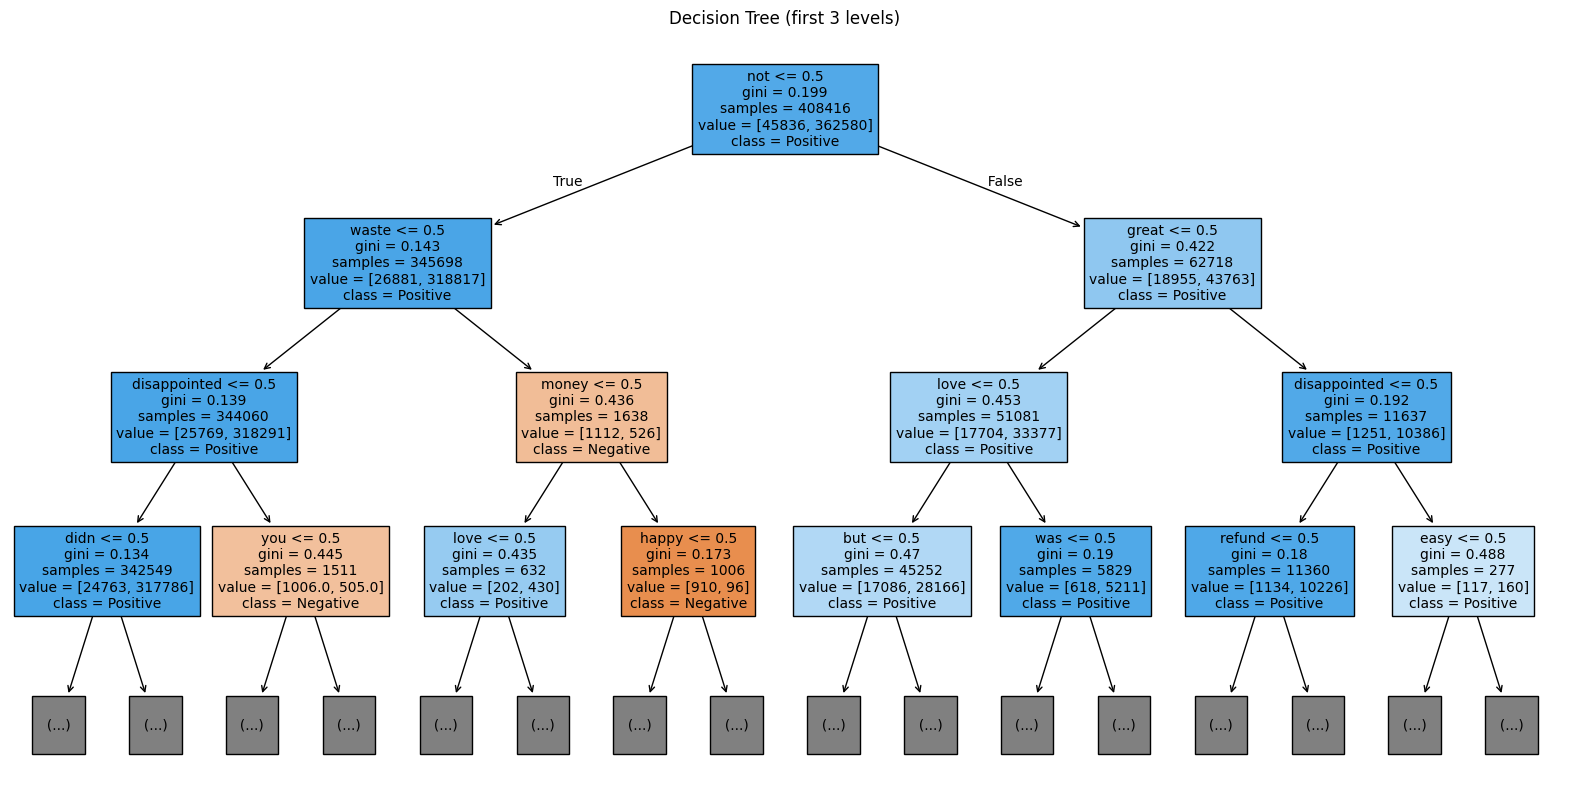

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

dt_model = DecisionTreeClassifier(max_depth=10, min_samples_split=50)
dt_model.fit(X_train, Y_train)

dt_accuracy = dt_model.score(X_test, Y_test)
print(f"\nDecision Tree Accuracy: {dt_accuracy:.4f}")
print(f"Logistic Regression Accuracy: {accuracy:.4f}")

plt.figure(figsize=(20, 10))
plot_tree(dt_model, max_depth=3, feature_names=vectorizer.get_feature_names_out(),
          class_names=['Negative', 'Positive'], filled=True, fontsize=10)
plt.title("Decision Tree (first 3 levels)")
plt.show()

## Model Performance

- **Decision Tree Accuracy**: 0.9017  
  The decision tree correctly classifies about 90% of the reviews. It performs well, but may struggle with complex patterns in the text.

- **Logistic Regression Accuracy**: 0.9418  
  Logistic regression achieves higher accuracy (~94%), indicating it captures the relationship between review text and sentiment better than the decision tree in this case.


## AdaBoost Classifier

1. **Model Setup**  
   - Base estimator: a **Decision Tree with max depth = 1** (a decision stump).  
   - AdaBoost combines **50 weak learners** sequentially to form a strong classifier.

2. **Training and Evaluation**  
   - The AdaBoost model is trained on `X_train` and `Y_train`.  
   - Accuracy is computed on `X_test`.

3. **Convergence and Overfitting Analysis**  
   - Accuracy is measured for different numbers of estimators (from 1 to 100).  
   - Training and test accuracy are plotted to observe:
     - How performance improves as more weak learners are added.
     - Potential overfitting if training accuracy rises while test accuracy stagnates or drops.

4. **Output**  
   - A plot shows **training vs. test accuracy** as the number of estimators increases, helping to choose the optimal number of weak learners.



AdaBoost Accuracy: 0.8894


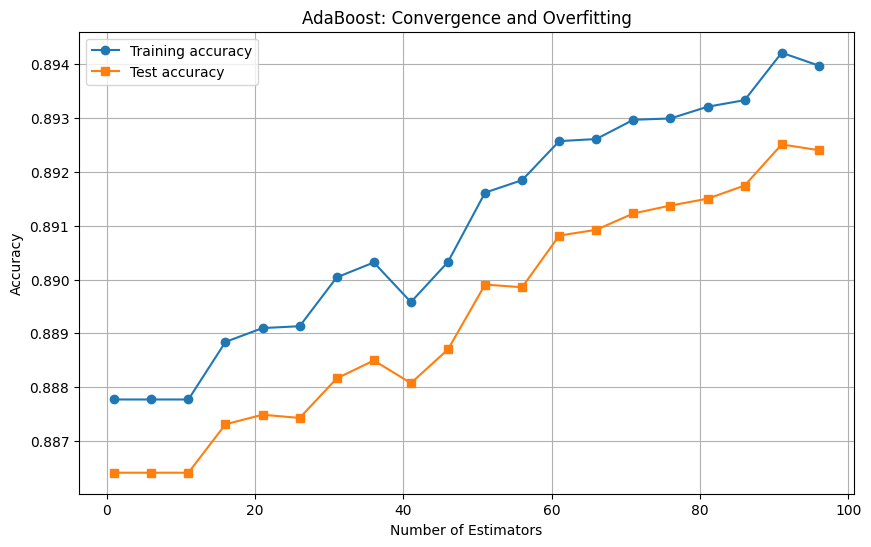

In [29]:
from sklearn.ensemble import AdaBoostClassifier

base_dt = DecisionTreeClassifier(max_depth=1)
ada_model = AdaBoostClassifier(estimator=base_dt, n_estimators=50, random_state=42)
ada_model.fit(X_train, Y_train)

ada_accuracy = ada_model.score(X_test, Y_test)
print(f"\nAdaBoost Accuracy: {ada_accuracy:.4f}")

n_estimators_range = range(1, 101, 5)
train_scores_ada = []
test_scores_ada = []

for n in n_estimators_range:
    ada = AdaBoostClassifier(estimator=base_dt, n_estimators=n, random_state=42)
    ada.fit(X_train, Y_train)
    train_scores_ada.append(ada.score(X_train, Y_train))
    test_scores_ada.append(ada.score(X_test, Y_test))

plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, train_scores_ada, 'o-', label='Training accuracy')
plt.plot(n_estimators_range, test_scores_ada, 's-', label='Test accuracy')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('AdaBoost: Convergence and Overfitting')
plt.legend()
plt.grid(True)
plt.show()